# Classify movie reviews

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.0.8'

In [2]:
from keras.datasets import imdb

In [3]:
(train_data,train_labels), (test_data,test_labels) = imdb.load_data(num_words=10000)

In [4]:
#num_word : lay 10 000 word pho bien nhat
word_index = imdb.get_word_index();

In [5]:
word_index['a']

3

### Word_index là tập các word và index của word đó
( Con số để decode trong data )

Ta sẽ decode thử 1 review từ train_data

In [6]:
word_index_reverse = dict([(a,b) for (b,a) in word_index.items()])

In [7]:
word_index_reverse[1]

'the'

In [8]:
decode = ''
for i in train_data[0]:
    decode = decode + word_index_reverse.get(i-3, '?')+' '
# get value cua i-3 trong word_index_reverse, neu khong co tra ve ?

In [9]:
decode

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## Chuẩn bị data

Chúng ta không thể cho trực tiếp các data vào network, phải biến chúng thành tensor  -> Có 2 cách :
- pad list để các review cùng length
- <b>one hot encoded</b> 

### Giải thích về one-hot encode trong bài toán này :


In [10]:
import numpy as np
def vectorized_sequences(sequences, dim=10000):
    # tạo ma trận 0 shape len(seq),dim
    results = np.zeros((len(sequences),dim))
    for i, sequence in enumerate(sequences):
        # đánh dấu index của result[i] sang 1
        # print(i, sequence)
        results[i, sequence] = 1
    return results


    

In [11]:
for i,j in enumerate(train_data[:10]):
    print(word_index_reverse.get(j[2]-3,'?'))

film
hair
has
?
mistake
better
production
?
got
movie


In [12]:
x_train = vectorized_sequences(train_data)
x_test = vectorized_sequences(test_data)

In [14]:
x_train.shape

(25000, 10000)

In [15]:
x_train

array([[ 0.,  1.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  1.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  1., ...,  0.,  0.,  0.]])

In [16]:
# vectorized labels : 
y_train = np.asarray(train_labels, dtype='float32')
y_test = np.asarray(test_labels,dtype='float32')

In [17]:
y_test

array([ 1.,  1.,  1., ...,  1.,  0.,  1.], dtype=float32)

## OK, Bây giờ chúng ta sẽ build network

Ta sẽ xây dựng 1 network với 3 layers :
- 2 hidden layers với 16 hidden unit, activation là relu
- output layer : activation là sigmoid 

In [18]:
from keras import models
from keras import layers


In [19]:
model = models.Sequential()
# Dense : FC layer 
# output = activation(dot(input, kernel)+ bias)
model.add(layers.Dense(16,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

Without	an	activation	function	like	 relu 	(also	called	a	non-linearity),	our	 Dense 	layer	would
consist	in	two	linear	operations,	a	dot	product	and	an	addition. </br>
output	=	dot(W,	input)	+	b </br>
So	the	layer	could	only	learn <b>linear transformations </b>	(affine	transformations)	of	the	input	data,	i.e.
the	hypothesis	space	of	the	layer	would	be	the	set	of	all	possible	linear	transformations	of	the
input	data	into	a	16-dimensional	space.	Such	an	hypothesis	space	is	too	restricted,	and	wouldn’t
benefit	from	multiple	layers	of	representations,	because	a	deep	stack	of	linear	layers	would	still
implement	a	linear	operation:	adding	more	layers	wouldn’t	extend	the	hypothesis	space.

Cuối cùng ta cần 1 optmizer và 1 loss function 
Trong bài này ta sẽ dùng binary-cross entropy

In [20]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

Ta cũng có thể truyền args vào optimizers như sau :

In [23]:
from keras import optimizers
from keras import metrics
from keras import losses

Sau đó gọi : 
```python
optimizer = optimizers.RMSprop(lr=0.001)
metrics = [metrics.binary_accuracy]
```


In [24]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

In [25]:
# chia data để có validation 
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## It's training time :D

In [26]:
history = model.fit(partial_x_train,partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 14s - loss: 0.5157 - binary_accuracy: 0.7895 - val_loss: 0.4009 - val_binary_accuracy: 0.8653
Epoch 2/20
15000/15000 [==============================] - 2s - loss: 0.3146 - binary_accuracy: 0.9029 - val_loss: 0.3247 - val_binary_accuracy: 0.8787
Epoch 3/20
15000/15000 [==============================] - 2s - loss: 0.2319 - binary_accuracy: 0.9246 - val_loss: 0.2808 - val_binary_accuracy: 0.8923
Epoch 4/20
15000/15000 [==============================] - 2s - loss: 0.1816 - binary_accuracy: 0.9430 - val_loss: 0.2729 - val_binary_accuracy: 0.8905
Epoch 5/20
15000/15000 [==============================] - 2s - loss: 0.1495 - binary_accuracy: 0.9513 - val_loss: 0.2780 - val_binary_accuracy: 0.8891
Epoch 6/20
15000/15000 [==============================] - 2s - loss: 0.1209 - binary_accuracy: 0.9631 - val_loss: 0.3221 - val_binary_accuracy: 0.8807
Epoch 7/20
15000/15000 [===================

model.fit() Trả về History object, và có chưa 1 member là history </br>
(là 1 dict có data về tất cả quá trình training)

In [27]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_binary_accuracy', 'val_loss', 'loss', 'binary_accuracy'])

## Plot quá trình training :

In [28]:
import matplotlib.pyplot as plt

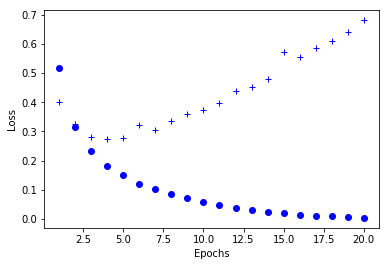

In [29]:
# plot training & validate loss
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)
# bo : blue dot
plt.plot(epochs, loss_values, 'bo')
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

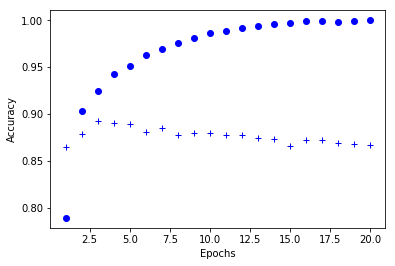

In [31]:
# plot training & validate accuracy
plt.clf() # clear figure truoc
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc_values,'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

### Nhận xét

- Dễ thấy training_loss giảm và training_acc tăng theo mỗi epoch (tks SGD)
- Nhưng val_loss và val_acc lại ngược lại từ epoch thứ 4 -> over-fitting
Các model làm tốt với training data <b>chưa chắc đã chính xác</b> với data mới </br>
trong trường hợp này, ta có thể dừng training chỉ sau 3 epochs

### Tạo 1 model mới và train với 4 epochs


In [32]:
model = models.Sequential()

model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss= losses.binary_crossentropy, 
             metrics = ['accuracy'])

model.fit(partial_x_train,partial_y_train,
         epochs=4,
         batch_size=512)

result = model.evaluate(x_test,y_test)

Epoch 1/4
15000/15000 [==============================] - 1s - loss: 0.5299 - acc: 0.7712     
Epoch 2/4
15000/15000 [==============================] - 1s - loss: 0.3149 - acc: 0.9005     
Epoch 3/4
15000/15000 [==============================] - 1s - loss: 0.2303 - acc: 0.9252     
Epoch 4/4
24992/25000 [============================>.] - ETA: 0s

In [33]:
result

[0.29251944739341734, 0.88395999999999997]

<b>Accuracy 88%</b>

## Predict sau khi đã train model 

In [34]:
model.predict(x_test)

array([[ 0.94102699],
       [ 0.79343379],
       [ 0.99759918],
       ..., 
       [ 0.63619214],
       [ 0.02018124],
       [ 0.84359801]], dtype=float32)

Model cho predict positive với các output ~1, và negative với các predict ~ 0
( confident )

### Ta sẽ test 1 số model với activation, số hidden unit và hidden layers khác  